In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Описание данных
https://www.kaggle.com/c/titanic/data

Посмотрим на данные.

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Глянем какие типы у нас есть.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Простая статистика.

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Простая статистика по категориальным.

In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<AxesSubplot:xlabel='Survived', ylabel='count'>

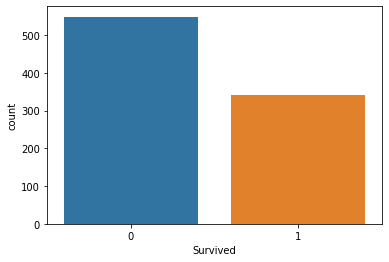

In [12]:
sns.countplot(x='Survived', data=train_df)

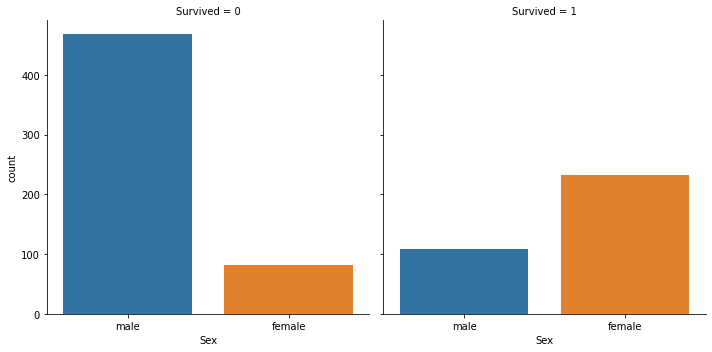

In [13]:
sns.catplot(x='Sex', col='Survived', kind='count', data=train_df)

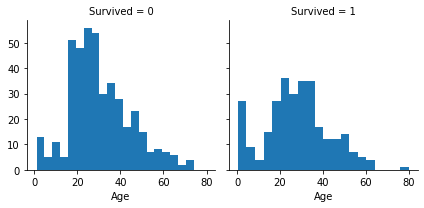

In [14]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

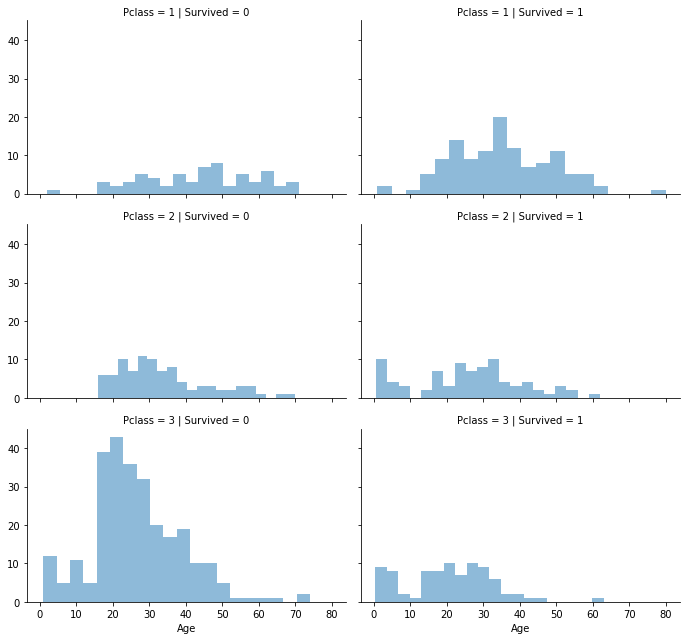

In [15]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Feature engineering

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train_df['Name'].unique()[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [18]:
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [19]:
train_df['Ticket'].unique()[:10]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736'], dtype=object)

In [20]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
train_df['Cabin'].unique()[:10]

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78'], dtype=object)

In [22]:
from sklearn.preprocessing import OrdinalEncoder

train_df["Embarked"].fillna('None',inplace=True)
test_df["Embarked"].fillna('None',inplace=True)

In [23]:
train_df["Embarked"].fillna('None',inplace=True)
test_df["Embarked"].fillna('None',inplace=True)

In [24]:
train_df["FamSize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamSize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [25]:
train_df["IsAlone"] = train_df.FamSize.apply(lambda x: 1 if x == 1 else 0)
test_df["IsAlone"] = test_df.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [26]:
train_df['Title']=train_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test_df['Title']=test_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [27]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [28]:
train_df.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)
train_df.Title.replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)
train_df.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [29]:
test_df.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)
test_df.Title.replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)
test_df.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [30]:
OE = OrdinalEncoder()

In [31]:
OE.fit(train_df[["Title",'Sex','Embarked']])

OrdinalEncoder()

In [32]:
train_df.loc[:,["Title",'Sex','Embarked']] = OE.transform(train_df[["Title",'Sex','Embarked']])

In [33]:
test_df.loc[:,["Title",'Sex','Embarked']] = OE.transform(test_df[["Title",'Sex','Embarked']])

In [34]:
train_df = train_df.drop(['Cabin','Ticket','Name'],axis=1)

In [35]:
test_df = test_df.drop(['Cabin','Ticket','Name'],axis=1)

# Three heroes

In [36]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,1.0,22.0,1,0,7.2500,3.0,2,0,3.0
1,2,1,1,0.0,38.0,1,0,71.2833,0.0,2,0,4.0
2,3,1,3,0.0,26.0,0,0,7.9250,3.0,1,1,2.0
3,4,1,1,0.0,35.0,1,0,53.1000,3.0,2,0,4.0
4,5,0,3,1.0,35.0,0,0,8.0500,3.0,1,1,3.0


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

In [38]:
X_train, X_test,y_train,y_test = train_test_split(train_df.drop('Survived',axis=1),train_df['Survived'],random_state=2)

### xgboost

In [39]:
from xgboost import XGBClassifier

In [40]:
eval_set = [(X_train,y_train),(X_test,y_test)]

In [41]:
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [42]:
print(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

0.8438433455028211


In [43]:
from eli5 import show_weights

In [44]:
show_weights(model)

Weight,Feature
0.4840,Sex
0.1585,Pclass
0.1007,SibSp
0.0703,Title
0.0421,FamSize
0.0321,Age
0.0308,Parch
0.0279,Fare
0.0268,Embarked
0.0267,PassengerId


In [45]:
predictions=model.predict_proba(test_df)

In [46]:
submission=pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':predictions[:,1]})
submission.head()

,PassengerId,Survived
0,892,0.008069
1,893,0.027776
2,894,0.021609
3,895,0.278360
4,896,0.335591


In [47]:
#submission.to_csv('titanic_submission.csv', header = True, index = False)

### lightgbm

In [ ]:
import lightgbm as lgb
import numpy as np

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [55]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

lgbm_params = {
    'objective': 'binary',
    'metric': 'auc'
}
evaluation_results={}
model = lgb.train(lgbm_params, lgb_train,  valid_sets=[lgb_train, lgb_eval], 
                 valid_names=['Train', 'Test'],
                 evals_result=evaluation_results)

y_pred = model.predict(X_test)

[1]	Train's auc: 0.905928	Test's auc: 0.808497
[2]	Train's auc: 0.90966	Test's auc: 0.823639
[3]	Train's auc: 0.909833	Test's auc: 0.819159
[4]	Train's auc: 0.913517	Test's auc: 0.830443
[5]	Train's auc: 0.916105	Test's auc: 0.841728
[6]	Train's auc: 0.920632	Test's auc: 0.841396
[7]	Train's auc: 0.920469	Test's auc: 0.842599
[8]	Train's auc: 0.923689	Test's auc: 0.84542
[9]	Train's auc: 0.929957	Test's auc: 0.852887
[10]	Train's auc: 0.931976	Test's auc: 0.860521
[11]	Train's auc: 0.933713	Test's auc: 0.86106
[12]	Train's auc: 0.936344	Test's auc: 0.862844
[13]	Train's auc: 0.937684	Test's auc: 0.864836
[14]	Train's auc: 0.939029	Test's auc: 0.867076
[15]	Train's auc: 0.941923	Test's auc: 0.867615
[16]	Train's auc: 0.942976	Test's auc: 0.869856
[17]	Train's auc: 0.944234	Test's auc: 0.866039
[18]	Train's auc: 0.946651	Test's auc: 0.865209
[19]	Train's auc: 0.947785	Test's auc: 0.865914
[20]	Train's auc: 0.948718	Test's auc: 0.864753
[21]	Train's auc: 0.950416	Test's auc: 0.866163
[22]

In [56]:
print(roc_auc_score(y_test,y_pred))

0.8467474278128112


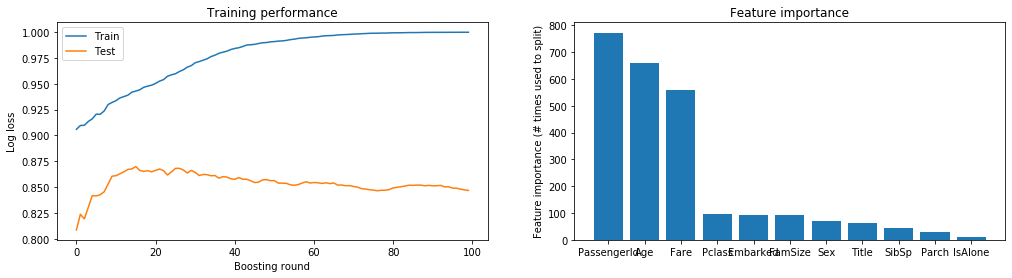

In [59]:
fig, axs = plt.subplots(1, 2, figsize=[17, 4])

# Plot the log loss during training
axs[0].plot(evaluation_results['Train']['auc'], label='Train')
axs[0].plot(evaluation_results['Test']['auc'], label='Test')
axs[0].set_ylabel('Log loss')
axs[0].set_xlabel('Boosting round')
axs[0].set_title('Training performance')
axs[0].legend()

# Plot feature importance
importances = pd.DataFrame({'features': model.feature_name(), 
                            'importance': model.feature_importance()}).sort_values('importance', ascending=False)
axs[1].bar(x=np.arange(len(importances)), height=importances['importance'])
axs[1].set_xticks(np.arange(len(importances)))
axs[1].set_xticklabels(importances['features'])
axs[1].set_ylabel('Feature importance (# times used to split)')
axs[1].set_title('Feature importance')

plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
param_grid = {'n_estimators':[20,100,500],'max_depth':[2,5,10]} 
grs = GridSearchCV(model, param_grid=param_grid, cv = 10, n_jobs=4, return_train_score = False)
grs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [20, 100, 500], 'max_depth': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [62]:
grid_search_preds=grs.predict_proba(X_test)[:,1]

In [63]:
print(roc_auc_score(y_test.values,grid_search_preds))

0.8474941918353799


## catboost

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

In [49]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [50]:
train_df=train_df.drop(['Ticket','Cabin'],axis=1)

In [51]:
X_train, X_test,y_train,y_test = train_test_split(train_df.drop('Survived',axis=1),train_df['Survived'],random_state=2)

In [52]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
199,200,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,13.000,S
129,130,3,"Ekstrom, Mr. Johan",male,45.0,0,0,6.975,S
90,91,3,"Christmann, Mr. Emil",male,29.0,0,0,8.050,S
230,231,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,83.475,S
126,127,3,"McMahon, Mr. Martin",male,NaN,0,0,7.750,Q


In [53]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [54]:
categorical_features_indices = [1,2,3,8]

In [55]:
X_train.iloc[:,categorical_features_indices]=X_train.iloc[:,categorical_features_indices].fillna('nan')

In [56]:
X_test.iloc[:,categorical_features_indices]=X_test.iloc[:,categorical_features_indices].fillna('nan')

In [57]:
from catboost import Pool, CatBoostClassifier

In [58]:
model=CatBoostClassifier(iterations=100,learning_rate=1,\
            depth=8,eval_metric='AUC')

In [59]:
model.fit(X_train,y_train,plot=True,cat_features=categorical_features_indices,eval_set=(X_test,y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8187023	best: 0.8187023 (0)	total: 62.6ms	remaining: 6.2s
1:	test: 0.8195735	best: 0.8195735 (1)	total: 72.1ms	remaining: 3.53s
2:	test: 0.8281613	best: 0.8281613 (2)	total: 73ms	remaining: 2.36s
3:	test: 0.8450050	best: 0.8450050 (3)	total: 76.4ms	remaining: 1.83s
4:	test: 0.8572851	best: 0.8572851 (4)	total: 78.8ms	remaining: 1.5s
5:	test: 0.8602307	best: 0.8602307 (5)	total: 80.4ms	remaining: 1.26s
6:	test: 0.8650846	best: 0.8650846 (6)	total: 82ms	remaining: 1.09s
7:	test: 0.8536343	best: 0.8650846 (6)	total: 84.4ms	remaining: 970ms
8:	test: 0.8614753	best: 0.8650846 (6)	total: 86.2ms	remaining: 871ms
9:	test: 0.8587786	best: 0.8650846 (6)	total: 87.9ms	remaining: 791ms
10:	test: 0.8582808	best: 0.8650846 (6)	total: 90.2ms	remaining: 730ms
11:	test: 0.8582808	best: 0.8650846 (6)	total: 91.4ms	remaining: 670ms
12:	test: 0.8640060	best: 0.8650846 (6)	total: 92.6ms	remaining: 619ms
13:	test: 0.8633422	best: 0.8650846 (6)	total: 94.4ms	remaining: 580ms
14:	test: 0.8637571	be